# Notebook to prep and explore the target MA yearly opioid overdose deaths table data
* City/Town name cleanup and matching, if needed
* EDA on the raw counts - data distribution, etc
* Note: the reporting style for MA city/town-level opioid overdose deaths has changed over the years, could only find data going back to 2012. Formatting was changed to tabulate opioid overdose deaths based on place of residence of descendent of deceased (Table 1) and by location of death (Table 2). 

### Outputs:
* Opioid overdose deaths by MA town/city Table 1: /data/tidy_data/ma_town_opioid_overdose_death_by_place_of_resid_2014_to_2018.csv
* Opioid overdose deaths by MA town/city Table 2: /data/tidy_data/ma_town_opioid_overdose_death_by_place_of_death_2014_to_2018.csv
* pdf notebook report: products/notebook_2_ma_overdose_deaths_by_town_cleanup_and_explore.pdf

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# MA gov opioid overdose deaths table 1 (by town of residence of decendent)
table1_raw = pd.read_csv("../../data/raw_data/ma_opioid_overdose_death_counts/ma_overdose_death_by_town_2014_2018_table1.csv")
# MA gov opioid overdose deaths table 2 (by town of death)
table2_raw = pd.read_csv("../../data/raw_data/ma_opioid_overdose_death_counts/ma_overdose_death_by_town_2014_2018_table2.csv")

In [3]:
# data shape and the first few rows:
print(table1_raw.shape)
print(table2_raw.shape)
display(table1_raw.head())
display(table2_raw.head())

(353, 6)
(354, 6)


,City/Town of Residence,2014,2015,2016,2017,2018
0,Abington,2,6,2,4,11
1,Acton,3,4,7,1,4
2,Acushnet,1,4,4,7,2
3,Adams,2,3,1,0,7
4,Agawam,3,5,4,7,12


,City/Town of Death,2014,2015,2016,2017,2018
0,Abington,0,6,1,3,5
1,Acton,1,2,3,0,1
2,Acushnet,0,4,2,4,0
3,Adams,2,3,1,0,4
4,Agawam,1,2,0,4,8


In [4]:
# copy over data before starting to manipulate the dfs
table1 = table1_raw.copy()
table2 = table2_raw.copy()
# rename cols
table1.columns = ['city_resid'] + list(table1_raw.columns[1:])
table2.columns = ['city_death'] + list(table2_raw.columns[1:])

In [5]:
# why more 1 more row in table 2?
print(set(table2['city_death']) - set(table1['city_resid']))
# this is mass residents that died outside of massachusetts

{'Out Of Massachusetts'}


In [6]:
# convert city names to lowercase, use as index
table1['city_resid'] = table1['city_resid'].str.lower()
table2['city_death'] = table2['city_death'].str.lower()
table1.set_index('city_resid', inplace=True)
table2.set_index('city_death', inplace=True)
display(table1.head())
display(table2.head())

,2014,2015,2016,2017,2018
city_resid,,,,,
abington,2,6,2,4,11
acton,3,4,7,1,4
acushnet,1,4,4,7,2
adams,2,3,1,0,7
agawam,3,5,4,7,12


,2014,2015,2016,2017,2018
city_death,,,,,
abington,0,6,1,3,5
acton,1,2,3,0,1
acushnet,0,4,2,4,0
adams,2,3,1,0,4
agawam,1,2,0,4,8


In [7]:
# how many individuals died outside of ma per year (table 2)?
table2.loc['out of massachusetts']

2014    29
2015    52
2016    90
2017    80
2018    62
Name: out of massachusetts, dtype: int64

What are the total opioid overdose death counts per year for table 1 (by town of residence) and table 2 (by town of death occurence), and how do they compare?

In [8]:
totals = pd.concat([table1.loc[['total']], table2.loc[['total']]], axis=0).reset_index()
totals['table'] = ['town_of_residence', 'town_of_death']
totals.drop('index', inplace=True, axis=1)

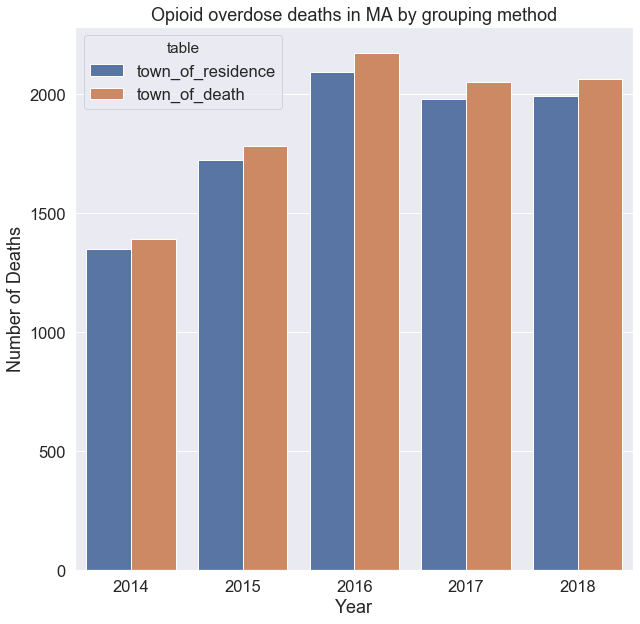

In [9]:
# how do the total death counts compare between the two tables?
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.barplot(x='variable', y='value', hue='table', data=totals.melt(id_vars=['table']))
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Opioid overdose deaths in MA by grouping method')
plt.show()

* The yearly totals for both datasets follow the same pattern - increasing between 2014-2016 and then leveling off/decreasing for 2017 and 2018.
* The totals for deaths by town of death occurence are slightly higher than the totals for place of residence of decedent

In [10]:
# totals check to make sure sum of all rows matches Total row - sanity check
table1_tot = table1.loc['total']
table2_tot = table2.loc['total']
table1.drop('total', inplace=True)
table2.drop('total', inplace=True)
print(table1.sum() - table1_tot)
print(table2.sum() - table2_tot)
# everything matches up

2014    0
2015    0
2016    0
2017    0
2018    0
dtype: int64
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: int64


In [11]:
# drop a couple of extra rows that will not be used in prediction model
table1.drop('unknown', inplace=True)
table2.drop(['unknown', 'out of massachusetts'], inplace=True)
print(table1.shape)
print(table2.shape)

(351, 5)
(351, 5)


What is the approximate shape/spread of the per town per year count data? 

In [12]:
display(table1.describe())
display(table2.describe())

,2014,2015,2016,2017,2018
count,351.000000,351.000000,351.000000,351.000000,351.000000
mean,3.846154,4.905983,5.965812,5.638177,5.669516
std,8.769051,12.030188,14.216850,14.080488,14.013021
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,2.000000,2.000000
75%,4.000000,5.000000,6.000000,6.000000,6.000000
max,108.000000,151.000000,194.000000,198.000000,181.000000


,2014,2015,2016,2017,2018
count,351.000000,351.000000,351.000000,351.000000,351.000000
mean,3.888889,4.931624,5.940171,5.615385,5.700855
std,12.331222,16.672335,18.792684,18.965463,18.375729
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,3.000000,3.500000,4.000000,4.000000
max,167.000000,226.000000,259.000000,279.000000,245.000000


Based on the quartiles - very skewed (lots of 0's and 1's)

Which towns have the highest death counts usually?

In [13]:
display(table1[table1['2014'] > 50])
display(table2[table2['2017'] > 100])

,2014,2015,2016,2017,2018
city_resid,,,,,
boston,108,151,194,198,181
worcester,56,82,74,82,97


,2014,2015,2016,2017,2018
city_death,,,,,
boston,167,226,259,279,245
worcester,86,120,109,118,134


What is the distribution of the yearly data?

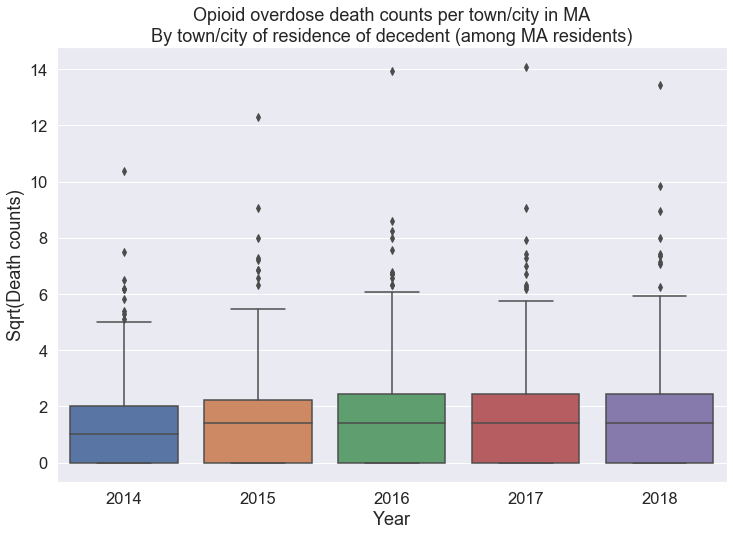

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(data=table1.apply(np.sqrt))
plt.xlabel('Year')
plt.ylabel('Sqrt(Death counts)')
plt.title('Opioid overdose death counts per town/city in MA\nBy town/city of residence of decedent (among MA residents)')
plt.show()

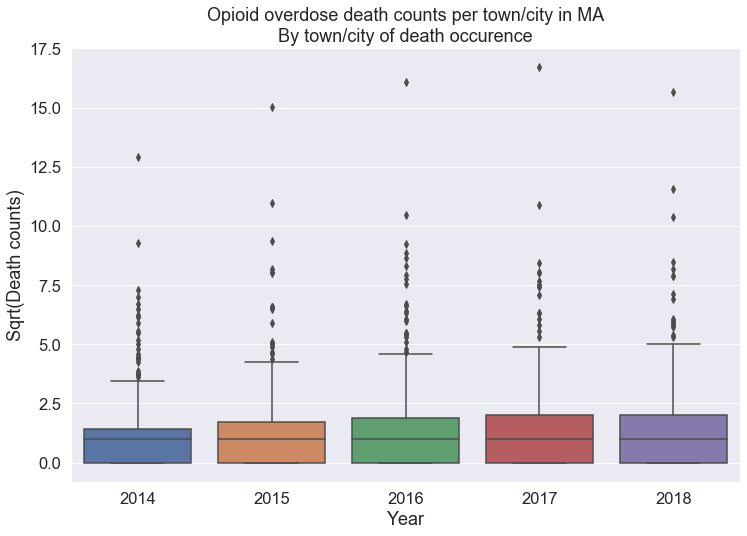

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(data=table2.apply(np.sqrt))
plt.xlabel('Year')
plt.ylabel('Sqrt(Death counts)')
plt.title('Opioid overdose death counts per town/city in MA\nBy town/city of death occurence')
plt.show()

What is the relationship between the data for different years? Assuming that there will be a strong correlation (ie towns that had a high death count one year will have a high death count the next year)

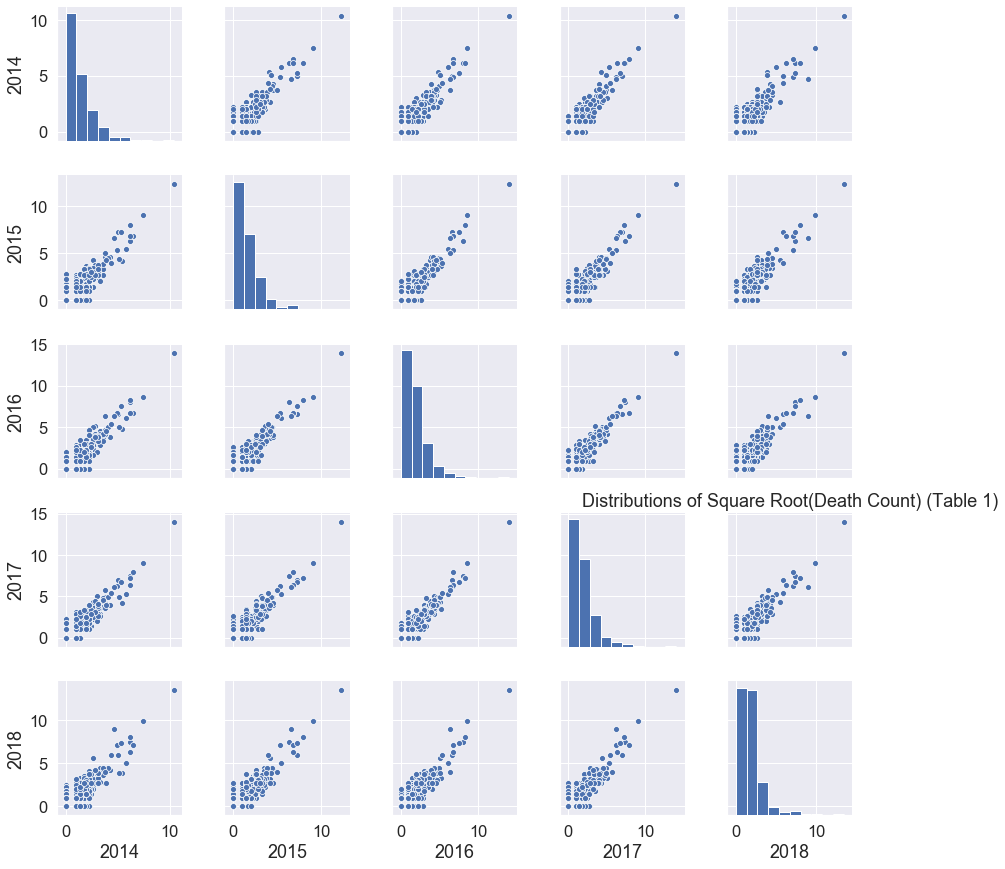

In [16]:
# square root all values to get a better look at data (vs log - infinity for all zeroes)
sns.pairplot(table1.apply(np.sqrt))
plt.title('Distributions of Square Root(Death Count) (Table 1)')
plt.show()

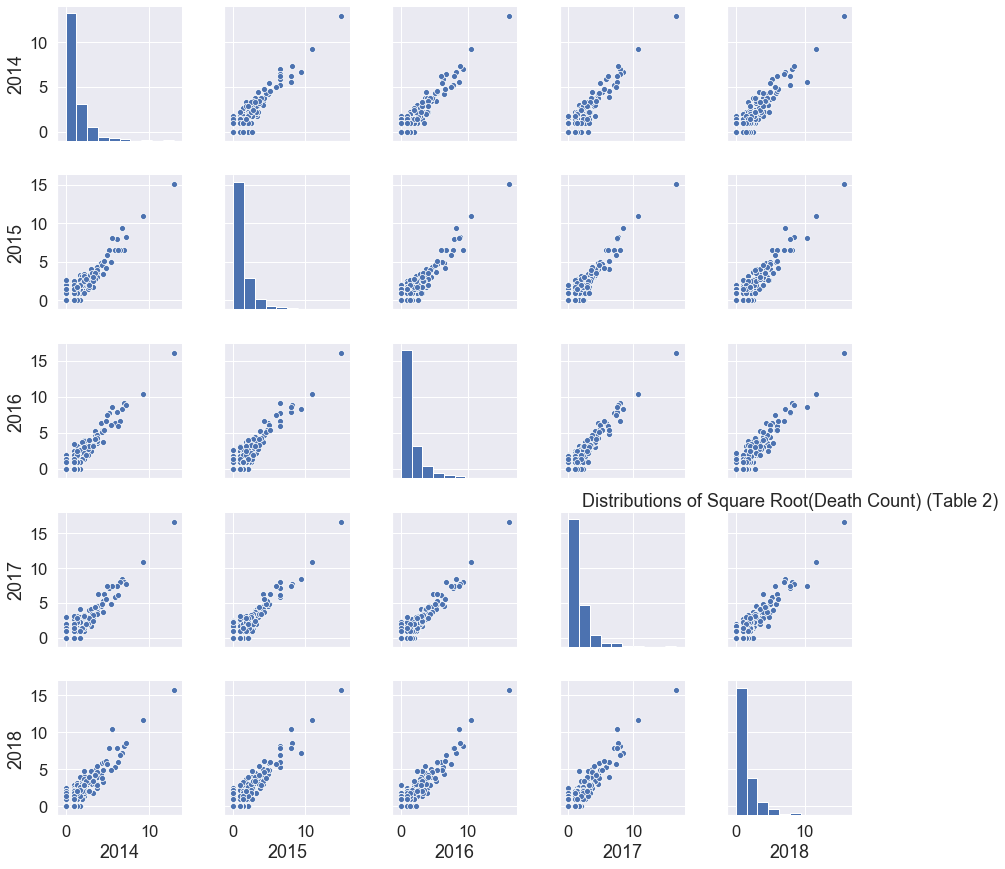

In [17]:
# square root all values to get a better look at data (vs log - infinity for all zeroes)
sns.pairplot(table2.apply(np.sqrt))
plt.title('Distributions of Square Root(Death Count) (Table 2)')
plt.show()

Notes:
* Overall, most death counts are close to 0 for MA towns - zero heavy distributions
* Boston and Worcester have highest death counts, but these are the cities with highest population counts in MA
* Strong positive relationship between death counts year over year for each town (not surprising)
* Normalize death count to population count for each town in some way - need population estimate for each town

In [18]:
#table1.to_csv("../../data/tidy_data/ma_town_opioid_overdose_death_by_place_of_resid_2014_to_2018.csv")
#table2.to_csv("../../data/tidy_data/ma_town_opioid_overdose_death_by_place_of_death_2014_to_2018.csv")